In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
import numpy as np

from IPython.display import display, clear_output
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from math import ceil

%matplotlib inline

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
#Functions for plotting images in MNIST

def display_function(imgs, name, size):
    n = imgs.shape[0]
    cols = 10
    rows = ceil(n / cols)
    plt.figure(figsize=(1.7 * cols, 2.2 * rows))
    plt.suptitle(name)
    for i in range(n):
        ax = plt.subplot(rows, cols, i + 1)
        display_mini(ax, imgs[i,:], size)
        
def display_mini(ax, img, size):
    plt.imshow(img.reshape(size), cmap='Greys_r')
    plt.xticks(())
    plt.yticks(())

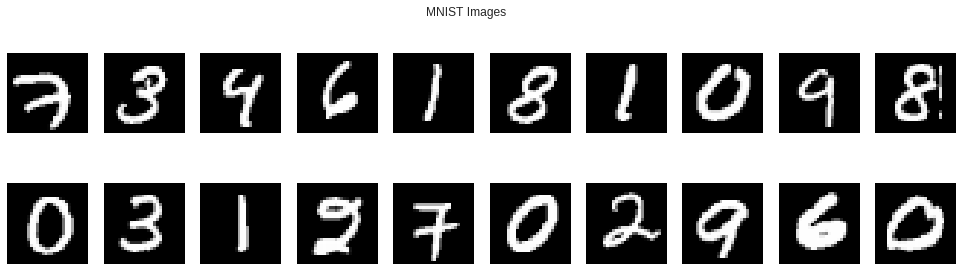

In [5]:
display_function(mnist.train.images[:20,:], "MNIST Images", (28,28))

**Fully-connected Neural Network for MNIST**

In [0]:
#Training and running neural net on complete train and test datasets

#Weight Variable
def weights(shape, name):
    i = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(i, name=name)

#Bias Variable
def bias(shape, name):
    i = tf.random_normal(shape)
    return tf.Variable(i, name=name)

In [7]:
X = tf.placeholder(tf.float32, [None, 784], name="X")
y = tf.placeholder(tf.float32, [None, 10], name="y")
dropout_var = tf.placeholder("float")

def neural_net(X, dp):
    # Input Layer with 784 units
    weights_1 = weights([784, 784], "weights_1")
    bias_1 = bias([784], "bias_1")

    layer_1 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(X, weights_1) + bias_1), keep_prob = dp)

    #First Hidden Layer with 1024 units
    weights_2 = weights([784, 1024], "weights_2")
    bias_2 = bias([1024], "bias_2")

    layer_2 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(layer_1, weights_2) + bias_2), keep_prob = dp)

    #Second Hidden Layer with 1024 units
    weights_3 = weights([1024, 1024], "weights_3")
    bias_3 = bias([1024], "bias_3")

    layer_3 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(layer_2, weights_3) + bias_3), keep_prob = dp)

    #Third Hidden Layer with 1024 units
    weights_4 = weights([1024, 1024], "weights_4")
    bias_4 = bias([1024], "bias_4")

    layer_4 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(layer_3, weights_4) + bias_4), keep_prob = dp)

    #Fourth Hidden Layer with 1024 units
    weights_5 = weights([1024, 1024], "weights_5")
    bias_5 = bias([1024], "bias_5")

    layer_5 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(layer_4, weights_5) + bias_5), keep_prob = dp)

    #Fifth Hidden Layer with 1024 units
    weights_6 = weights([1024, 1024], "weights_6")
    bias_6 = bias([1024], "bias_6")

    layer_6 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(layer_5, weights_6) + bias_6), keep_prob = dp)

    #Output layer with 10 units
    output_weights = weights([1024, 10], "output_weights")
    output_bias = bias([10], "output_bias")

    output = tf.matmul(layer_6, output_weights) + output_bias

    return ([output, layer_6, layer_5, layer_4, layer_3, layer_2, layer_1], [weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, output_weights], [bias_1, bias_2, bias_3, bias_4, bias_5, bias_6, output_bias])

#Output 
out, weights_nn, bias_nn = neural_net(X, dropout_var)
output = out[0]

#Optimization
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output, labels = y)) 
train_optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#Checking Accuracy
pred_check = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(pred_check, tf.float32))

#Initializing
init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
#Running model and testing on the test dataset

max_epochs = 50
batch_size = 100
step = 4

sess = tf.InteractiveSession()
sess.run(init)

for epoch in range(max_epochs):
    batch = int(mnist.train.num_examples/batch_size)
    
    for i in range(batch):
        b_x, b_y = mnist.train.next_batch(batch_size)
        data = {X: b_x, y: b_y, dropout_var : 0.7}
        sess.run(train_optimizer, feed_dict=data)
        
    if (epoch+1) % step == 0:
        print ("Epoch: %03d/%03d" % (epoch, max_epochs))
        data = {X: b_x, y: b_y, dropout_var : 1.}
        train_out = sess.run(out, feed_dict=data)
        train_weights_nn = sess.run(weights_nn, feed_dict=data)
        train_bias_nn = sess.run(bias_nn, feed_dict=data)
        train_output = sess.run(output, feed_dict=data)
        train_acc = sess.run(accuracy, feed_dict=data)
        print ("MNIST Training accuracy: %.3f" % (train_acc))
        data = {X: mnist.test.images, y: mnist.test.labels, dropout_var : 1.}
        test_out = sess.run(out, feed_dict=data)
        test_weights_nn = sess.run(weights_nn, feed_dict=data)
        test_output = sess.run(output, feed_dict=data)
        test_acc = sess.run(accuracy, feed_dict=data)
        print ("MNIST Test accuracy: %.3f" % (test_acc))
print ("=========================Model Optimization Complete============================")

Epoch: 003/050
MNIST Training accuracy: 0.980
MNIST Test accuracy: 0.962
Epoch: 007/050
MNIST Training accuracy: 0.950
MNIST Test accuracy: 0.975
Epoch: 011/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.981
Epoch: 015/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.979
Epoch: 019/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.982
Epoch: 023/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.982
Epoch: 027/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.983
Epoch: 031/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.984
Epoch: 035/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.985
Epoch: 039/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.985
Epoch: 043/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.984
Epoch: 047/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.983
=========================Model Optimization Complete============================


**Compression using SVD**

In [0]:
#Performing SVD on the weights of the 5 hidden layers

hidden_weight_1 = train_weights_nn[1]
hidden_weight_2 = train_weights_nn[2]
hidden_weight_3 = train_weights_nn[3]
hidden_weight_4 = train_weights_nn[4]
hidden_weight_5 = train_weights_nn[5]

s0, u0, v0 = tf.linalg.svd(train_weights_nn[0])
s1, u1, v1 = tf.linalg.svd(hidden_weight_1)
s2, u2, v2 = tf.linalg.svd(hidden_weight_2)
s3, u3, v3 = tf.linalg.svd(hidden_weight_3)
s4, u4, v4 = tf.linalg.svd(hidden_weight_4)
s5, u5, v5 = tf.linalg.svd(hidden_weight_5)

In [0]:
#Feed-forward network setup using svd compressed weight matrices

D = tf.placeholder(tf.int32, shape = (), name = "D")

#Feed-forward network
hidden_bias_1 = train_bias_nn[1]
hidden_bias_2 = train_bias_nn[2]
hidden_bias_3 = train_bias_nn[3]
hidden_bias_4 = train_bias_nn[4]
hidden_bias_5 = train_bias_nn[5]

def neural_net_compressed(X, D, dp):
  ip = tf.add(tf.matmul(tf.multiply(tf.matmul(X, u0[:,0:D]), s0[0:D]), tf.transpose(v0)[0:D,:]), train_bias_nn[0])
  ip = tf.nn.dropout(tf.nn.sigmoid(ip), keep_prob = dp)

  hidden_l1 = tf.add(tf.matmul(tf.multiply(tf.matmul(ip, u1[:,0:D]), s1[0:D]), tf.transpose(v1)[0:D,:]), hidden_bias_1)
  hidden_l1 = tf.nn.dropout(tf.nn.sigmoid(hidden_l1), keep_prob = dp)

  hidden_l2 = tf.add(tf.matmul(tf.multiply(tf.matmul(hidden_l1, u2[:,0:D]), s2[0:D]), tf.transpose(v2)[0:D,:]), hidden_bias_2)
  hidden_l2 = tf.nn.dropout(tf.nn.sigmoid(hidden_l2), keep_prob = dp)

  hidden_l3 = tf.add(tf.matmul(tf.multiply(tf.matmul(hidden_l2, u3[:,0:D]), s3[0:D]), tf.transpose(v3)[0:D,:]), hidden_bias_3)
  hidden_l3 = tf.nn.dropout(tf.nn.sigmoid(hidden_l3), keep_prob = dp)

  hidden_l4 = tf.add(tf.matmul(tf.multiply(tf.matmul(hidden_l3, u4[:,0:D]), s4[0:D]), tf.transpose(v4)[0:D,:]), hidden_bias_4)
  hidden_l4 = tf.nn.dropout(tf.nn.sigmoid(hidden_l4), keep_prob = dp)

  hidden_l5 = tf.add(tf.matmul(tf.multiply(tf.matmul(hidden_l4, u5[:,0:D]), s5[0:D]), tf.transpose(v5)[0:D,:]), hidden_bias_5)
  hidden_l5 = tf.nn.dropout(tf.nn.sigmoid(hidden_l5), keep_prob = dp)
  
  output = tf.matmul(hidden_l5, train_weights_nn[6]) + train_bias_nn[6]

  return ([output, hidden_l5, hidden_l4, hidden_l3, hidden_l2, hidden_l1, ip])

#Output 
out_svd = neural_net_compressed(X, D, dropout_var)
output_svd = out_svd[0]

#Checking Accuracy
svd_pred = tf.nn.softmax(logits = output_svd)
svd_check = tf.equal(tf.argmax(svd_pred, 1), tf.argmax(y, 1))
svd_accuracy = tf.reduce_mean(tf.cast(svd_check, 'float'))

In [0]:
d_values = [10, 20, 50, 100, 200, 784]
accuracies_svd = np.zeros(len(d_values))

#Checking accuracy on mnist
for i in range(len(d_values)):
    accuracies_svd[i] = sess.run(svd_accuracy, feed_dict = {D: d_values[i], X:mnist.test.images, y: mnist.test.labels, dropout_var : 1.})

Text(0.5, 0, 'D values')

Text(0, 0.5, 'Test Accuracy')

Text(0.5, 1.0, 'Test Accuracies for different SVD low rank (D) values')

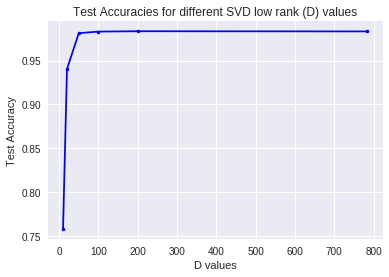

In [12]:
#Plotting accuracy values

plt.plot(d_values, accuracies_svd, '.b-')
plt.xlabel("D values")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracies for different SVD low rank (D) values")
plt.show()

In [13]:
print (accuracies_svd)

[0.75779998 0.94019997 0.98119998 0.98299998 0.98339999 0.98320001]


**Improve Compression using D=20**

In [0]:
#Defining weights and biases as tf variables for the new neural network (D = 20)

d_new = 20

V0 = tf.Variable(tf.transpose((s0[:d_new]*v0[:, :d_new])), name = 'V0')
U0 = tf.Variable(u0[:,:d_new], name = 'U0')
B0 = tf.Variable(train_bias_nn[0], name = 'B0')

V1 = tf.Variable(tf.transpose(s1[:d_new]*v1[:, :d_new]), name = 'V1')
U1 = tf.Variable(u1[:,:d_new], name = 'U1')
B1 = tf.Variable(train_bias_nn[1], name = 'B1')

V2 = tf.Variable(tf.transpose(s2[:d_new]*v2[:, :d_new]), name = 'V2')
U2 = tf.Variable(u2[:,:d_new], name = 'U2')
B2 = tf.Variable(train_bias_nn[2], name = 'B2')

V3 = tf.Variable(tf.transpose(s3[:d_new]*v3[:, :d_new]), name = 'V3')
U3 = tf.Variable(u3[:,:d_new], name = 'U3')
B3 = tf.Variable(train_bias_nn[3], name = 'B3')

V4 = tf.Variable(tf.transpose(s4[:d_new]*v4[:, :d_new]), name = 'V4')
U4 = tf.Variable(u4[:,:d_new], name = 'U4')
B4 = tf.Variable(train_bias_nn[4], name = 'B4')

V5 = tf.Variable(tf.transpose(s5[:d_new]*v5[:, :d_new]), name = 'V5')
U5 = tf.Variable(u5[:,:d_new], name = 'U5')
B5 = tf.Variable(train_bias_nn[5], name = 'B5')

WT_OUT = tf.Variable(train_weights_nn[6], name = 'WT_OUT')
BS_OUT = tf.Variable(train_bias_nn[6], name = 'BS_OUT')

In [0]:
variable_list_svd = [V0, U0, V1, U1, V2, U2, V3, U3, V4, U4, V5, U5, B0, B1, B2, B3, B4, B5, WT_OUT, BS_OUT]
init_custom = tf.variables_initializer(var_list=variable_list_svd)

sess.run(init_custom)

In [0]:
#Feed-forward network using svd (D=20) weights

L_inp = tf.add(tf.matmul(X,(tf.matmul(U0,V0))), B0)
L_inp = tf.nn.dropout(tf.nn.sigmoid(L_inp), keep_prob = dropout_var)

L_1 = tf.add(tf.matmul(L_inp,(tf.matmul(U1,V1))), B1)
L_1 = tf.nn.dropout(tf.nn.sigmoid(L_1), keep_prob = dropout_var)

L_2 = tf.add(tf.matmul(L_1,(tf.matmul(U2,V2))), B2)
L_2 = tf.nn.dropout(tf.nn.sigmoid(L_2), keep_prob = dropout_var)

L_3 = tf.add(tf.matmul(L_2,(tf.matmul(U3,V3))), B3)
L_3 = tf.nn.dropout(tf.nn.sigmoid(L_3), keep_prob = dropout_var)

L_4 = tf.add(tf.matmul(L_3,(tf.matmul(U4,V4))), B4)
L_4 = tf.nn.dropout(tf.nn.sigmoid(L_4), keep_prob = dropout_var)

L_5 = tf.add(tf.matmul(L_4,(tf.matmul(U5,V5))), B5)
L_5 = tf.nn.dropout(tf.nn.sigmoid(L_5), keep_prob = dropout_var)
  
output = tf.matmul(L_5, WT_OUT) + BS_OUT

#Output
output_svd_20 = output

In [0]:
#Optimization
temp = set(tf.global_variables())
svd_20_preds = tf.nn.softmax(logits = output_svd_20)
svd_20_check = tf.equal(tf.argmax(svd_20_preds, 1), tf.argmax(y, 1))
svd_20_accuracy = tf.reduce_mean(tf.cast(svd_20_check, 'float'))

svd_cost_20 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_svd_20, labels = y))
svd_optimizer_20 = tf.train.AdamOptimizer(learning_rate = 0.00001).minimize(svd_cost_20)

sess.run(tf.variables_initializer(set(tf.global_variables()) - temp))

In [18]:
#Running model and testing on the test dataset

max_epochs = 60
batch_size = 100
step = 4

for epoch in range(max_epochs):
    batch = int(mnist.train.num_examples/batch_size)
    
    for i in range(batch):
        b_x, b_y = mnist.train.next_batch(batch_size)
        data = {X: b_x, y: b_y, dropout_var : 0.7}
        sess.run(svd_optimizer_20, feed_dict=data)
        
    if (epoch+1) % step == 0:
        print ("Epoch: %03d/%03d" % (epoch, max_epochs))
        data = {X: b_x, y: b_y, dropout_var : 1.}
        train_output_svd_20 = sess.run(output_svd_20, feed_dict=data)
        train_acc_svd_20 = sess.run(svd_20_accuracy, feed_dict=data)
        print ("MNIST Training accuracy: %.3f" % (train_acc_svd_20))
        data = {X: mnist.test.images, y: mnist.test.labels, dropout_var : 1.}
        test_output_svd_20 = sess.run(output_svd_20, feed_dict=data)
        test_acc_svd_20 = sess.run(svd_20_accuracy, feed_dict=data)
        print ("MNIST Test accuracy: %.3f" % (test_acc_svd_20))
print ("=========================Model Optimization Complete============================")

Epoch: 003/060
MNIST Training accuracy: 0.960
MNIST Test accuracy: 0.974
Epoch: 007/060
MNIST Training accuracy: 0.950
MNIST Test accuracy: 0.975
Epoch: 011/060
MNIST Training accuracy: 0.980
MNIST Test accuracy: 0.975
Epoch: 015/060
MNIST Training accuracy: 0.980
MNIST Test accuracy: 0.976
Epoch: 019/060
MNIST Training accuracy: 0.990
MNIST Test accuracy: 0.977
Epoch: 023/060
MNIST Training accuracy: 0.990
MNIST Test accuracy: 0.977
Epoch: 027/060
MNIST Training accuracy: 0.980
MNIST Test accuracy: 0.978
Epoch: 031/060
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.978
Epoch: 035/060
MNIST Training accuracy: 0.990
MNIST Test accuracy: 0.978
Epoch: 039/060
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.979
Epoch: 043/060
MNIST Training accuracy: 0.980
MNIST Test accuracy: 0.979
Epoch: 047/060
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.979
Epoch: 051/060
MNIST Training accuracy: 0.970
MNIST Test accuracy: 0.979
Epoch: 055/060
MNIST Training accuracy: 1.000
MNIST